![banner-pdi](https://user-images.githubusercontent.com/58775072/141189378-b5df3287-e8c0-48a1-ad11-825ba317463b.png)

## Universidade Federal de Campina Grande (UFCG)
## Centro de Engenharia Elétrica e Informática (CEEI) 
## Disciplina: Int. ao Processamento de Imagem Digital e Visão Computacional
## Professora: Luciana Ribeiro Veloso
## Aluno(a): Coloque seu nome aqui

# <span style='color:brown'>Experimento 05: Segmentação - Pt. 2</span>
***

## Sumário de Conteúdos

* [0. Importação dos Pacotes](#0)
* [1. Transformada de Hough](#1)
* [2. Segmentação por Limiarização](#2)
* [3. Segmentação por Cor](#3)

## <span style='color:red'>Observações</span>
***

1. Os arquivos de laboratório devem ser salvos seguindo o seguinte padrão: `lab-x-nome-sobrenome.ipynb`.
2. Não esqueça de colocar o seu nome no cabeçalho acima.
3. Não altere a ordem das células e realize as implementações somente nos campos específicados.  
4. Ao longo do laboratório será solicitado perguntas teóricas relativas aos assuntos das aulas da disciplina e implementações de código utilizando a linguagem de programação Python. 
5. <span style='color:blue'>As células com as perguntas estão representadas pela cor azul</span>. <span style='color:green'>As células de resposta teórica estão representadas pela cor verde</span>.
6. As células de implementação com código serão indicadas pelos seguintes comentários: `# IMPLEMENTE O SEU CÓDIGO AQUI`.
7. Para editar uma célula de texto, basta clicar duas vezes com o cursos do mouse para editar, e `Ctrl + Enter` para finalizar a edição. 
8. Para rodar as células com os códigos desenvolvidos, digite `Ctrl + Enter` ou clique em `Run` no menu do Jupyter.
9. Dúvidas, problemas de execução de código ou dificuldades com a linguagem de programação Python devem ser feitas durante as aulas de laboratório, encaminhadas para o grupo de WhatsApp da turma ou fórum do PVAE da disciplina.
10. Os laboratórios devem ser enviados nos campos especificados pelo PVAE. <span style='color:red'>ATENTE-SE AOS PRAZOS DE ENTREGA!</span>

## Importação dos Pacotes

In [1]:
import os                            # Operational System para manipulação de arquivos.
import cv2                           # OpenCV para manipulação de imagens.
import numpy as np                   # Numpy para manipulação de matrizes e arrays.
import matplotlib.pyplot as plt      # Pyplot para plotagem de gráficos e imagens.

In [14]:
#So execute caso ainda não possua a pasta imagens!!

import urllib.request as url         # urllib para baixar arquivos via HTTPS
import zipfile                

# baixando as imagens de referência
url.urlretrieve('https://github.com/Alyssonmach/pdi-labs/raw/main/imagens.zip', 'imagens.zip')
with zipfile.ZipFile('imagens.zip', 'r') as zip_ref:
    zip_ref.extractall('')

## Transformada de Hough

A biblioteca OpenCV disponibiliza funções para a aplicação da Transformada de Hough, viabilizando a identificação de retas e círculos:

1. Detecção de Linhas:  
    * **lines = cv2.HoughLines(src_img, $\rho_{res}$, $\theta_{res}$, threshold)**
    * **src_img** é a imagem de entrada e deve ser uma imagem binária;
    * $\rho_{res}$ controla a sensibilidade da variável $\rho$, em unidades;
    * $\theta_{res}$ controla a sensibilidade da variável $\theta$, em radianos;
    * **threshold** é o limiar do acumulador para que uma linha seja considerada válida;
    * **lines** é um array que armazena as linhas;
        * A variável tem dimensões (L, 1, 2), sendo L o número de linhas detectadas
        * Cada linha tem dimensões (1, 2) -> [$\rho$, $\theta$]
        * A i-ésima linha é acessada por linha = lines[ i ]  
        
2. Detecção de Círculos:
    * **circles = cv2.HoughCircles(src_img, cv2.HOUGH_GRADIENT, dp, dist, param1, param2, minRadius=0, maxRadius=0)**
    * **src_img** é a imagem de entrada;
    * **cv2.HOUGH_GRADIENT** é um flag que determina o método a ser utilizado pelo algoritmo;
    * **dp** controla a resolução da matriz de acumuladores;
    * **dist** controla a distância mínima entre círculos para suprimir múltiplas detecção de um mesmo objeto;
    * **param1** representa o limiar superior de um detector de Canny aplicado internamente à função, o limiar inferior é escolhido como param1/2;
    * **param2** é uma variável análoga ao threshold de cv2.HoughLines e controla o limiar do acumulador para os círculos;
    * **minRadius** e **maxRadius** controlam os valores mínimo e máximo do raio dos círculos detectados. São ignorados se deixados no valor default 0.
    * **circles** é um array que armazena os círculos;
        * A variável tem dimensões **(C, 3)**, sendo C o número de círculos detectados
        * Cada círculo de raio r e centrado em **(x1, y1)** tem dimensões (3) -> [x1, y1, r]

As funções a seguir podem ser utilizadas para desenhar linhas e círculos detectados:      

* **cv2.line(dst_img, (x1,y1), (x2,y2), color, width)**
* **cv2.circle(dst_img, (cx, cy), r, color, width)**
    * **dst_img** é a imagem de saída onde o desenho será feito;
    * **(x1, y1)** e **(x2, y2)** representam pontos do início/fim da linha desenhada;
    * **(cx, cy)** e **r** representam as coordenadas do centro do círculo e o raio, respectivamente;
    * **color** é uma tupla rgb (vermelho, verde, azul) que indica a cor da linha/circulo desenhado;
    * **width** indica a largura das linhas. Pode ser -1 no caso do circulo, indicando que a forma deve ser preenchida;

 ## <span style='color:blue'>Questão 1: [Valor da Questão: 2.0][Taxa de acerto: x.x]</span>
* (a) <span style='color:blue'> **O código abaixo realiza a detecção de linhas da imagem “Fig1034(a)(marion_airport).tif” utilizando a transformada de Hough. O que representam os pontos (x0, y0) marcados em ciano?**</span>


Text(0.5, 1.0, 'Detecção de Linhas')

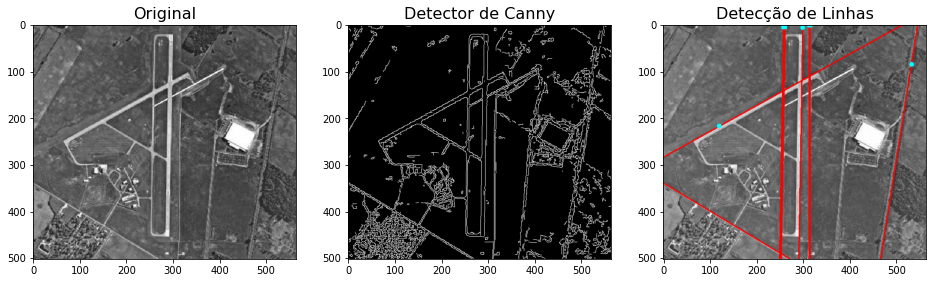

In [2]:
# Lê imagem e converte para escala de cinza
rgb_img = cv2.imread("imagens/Fig1034(a)(marion_airport).tif") [:, :, ::-1]
src_img = cv2.cvtColor( rgb_img, cv2.COLOR_RGB2GRAY )

# Realiza detecção de bordas
canny_output = cv2.Canny(image = src_img, threshold1 = 100, threshold2 = 200, L2gradient = True )

# Realiza detecção de linhas
lines = cv2.HoughLines(image = canny_output,  rho = 1 ,  theta = 1 * np.pi / 180 , threshold = 200)

# Desenha as linhas em uma cópia de rgb_img
dst_img = rgb_img.copy()

for line in lines:
    rho   = line[0][0]
    theta = line[0][1]
    
    # Linhas
    x1 = int(rho * np.cos(theta) - 1000 * np.sin(theta))
    y1 = int(rho * np.sin(theta) + 1000 * np.cos(theta))
    x2 = int(rho * np.cos(theta) + 1000 * np.sin(theta))
    y2 = int(rho * np.sin(theta) - 1000 * np.cos(theta))
    cv2.line(img = dst_img, pt1 = (x1,y1), pt2 = (x2,y2), color = (255, 0, 0), thickness = 2)

    # Pontos
    x0 = int(rho * np.cos(theta))
    y0 = int(rho * np.sin(theta))
    cv2.circle(img = dst_img, center = (x0, y0), radius = 5, color = (0, 255, 255), thickness = -1)

# Plots
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(16, 24))
    
# Imagem Original
axs[0].imshow(src_img, cmap="gray")
axs[0].set_title("Original", fontsize = 16)

# Filtragem
axs[1].imshow(canny_output, vmin = 0, vmax = 255, cmap="gray")
axs[1].set_title("Detector de Canny", fontsize = 16)

# Filtragem
axs[2].imshow(dst_img, vmin = 0, vmax = 255)
axs[2].set_title("Detecção de Linhas", fontsize = 16)

## <span style='color:green'>Respostas da Questão 1:</span>

* (a) <span style='color:green'>Adicione sua resposta aqui.</span>

* (b) <span style='color:blue'> **Modifique o código acima para que sejam detectadas apenas as linhas referentes às pistas de pouso do aeroporto. Observe que o parâmetro $\theta$ em lines é dado em radianos.**</span>

In [7]:
#  IMPLEMENTE SEU CÓDIGO AQUI -> QUESTÃO 1 letra (b)


 ## <span style='color:blue'>Questão 2: [Valor da Questão: 1.0][Taxa de acerto: x.x]</span>
 
* <span style='color:blue'> **O código abaixo utiliza a transformada de Hough para circular todos os planetas em um desenho do nosso Sistema Solar. Modifique os parâmetros da função cv2.HoughCircles e tente circular os planetas individualmente. Comente os resultados observados.**</span>

In [8]:
def draw_circles(src_img, circles_array, color = (255, 0, 0), width = 1):
    """Desenha círculos detectadas pela transformada de Hough.
    Args:
        src_img: imagem de entrada;
        lines_array: array com as linhas detectadas;
        color: tupla rgb que indica a cor das linhas desenhadas;
        width: largura das linhas desenhadas;

    Returns:
        dst_img: Cópia de src_img com linhas desenhadas;
     """
        
    dst_img = src_img.copy()
    circles_array = np.uint16(np.around(circles_array))
    for circle in circles_array[0]:
        x1, y1, r = circle
        # Circunferência
        cv2.circle(dst_img, (x1, y1), r, color, width)
        # Centro
        cv2.circle(dst_img, (x1, y1), 10, (255, 0, 255), -1)
        
    return dst_img

Text(0.5, 1.0, 'Detecção de Círculos')

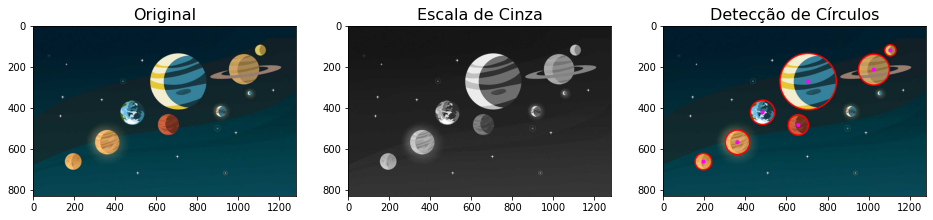

In [9]:
# Lê imagem e converte para escala de cinza
bgr_img = cv2.imread("imagens/planets.jpg") [:, :, ::-1]
src_img = cv2.cvtColor( bgr_img, cv2.COLOR_RGB2GRAY )

# detectando todos os planetas
circles = cv2.HoughCircles(src_img,cv2.HOUGH_GRADIENT, 1, 100, param1=100, param2=50, minRadius=15, maxRadius=150)
dst_img = draw_circles(bgr_img, circles, color = (255, 0, 0), width = 5)

# Plots
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(16, 24))
    
# Imagem Original
axs[0].imshow(bgr_img, vmin = 0, vmax = 255, cmap="gray")
axs[0].set_title("Original", fontsize = 16)

# Filtragem
axs[1].imshow(src_img, vmin = 0, vmax = 255, cmap="gray")
axs[1].set_title("Escala de Cinza", fontsize = 16)

# Filtragem
axs[2].imshow(dst_img, vmin = 0, vmax = 255)
axs[2].set_title("Detecção de Círculos", fontsize = 16)

In [10]:
# IMPLEMENTE SEU CÓDIGO AQUI -> QUESTÃO 2 


## <span style='color:green'>Respostas da Questão 2:</span>

* <span style='color:green'>Adicione sua resposta aqui.</span>

## Segmentação por Limiarização
A biblioteca OpenCV disponibiliza funções para a limiarização de imagens:

1. Limiarização com limiar global:  
    * **limiar, th1 = cv2.threshold( src_img, limiar, vmax, cv2.THRESH_BINARY )**
2. Limiarização com limiar global escolhido automaticamente:
    * **limiar, th1 = cv2.threshold( src_img, 0, vmax, cv2.THRESH_BINARY + cv2.THRESH_OTSU )**
3. Limiarização com limiar local escolhido automaticamente:
    * **th1 = cv2.adaptiveThreshold(src_img, vmax, flag, cv2.THRESH_BINARY, block_size, C)**
    
As variáveis listadas correspondem a:
* **src_img** é a imagem de entrada;
* **limiar** é o valor global de limiarização;
* **vmax** é o valor para o qual os pixels acima do limiar são setados;
* **cv2.THRESH_BINARY** é um flag que indica o tipo de limiarização a ser executado. Outras opções estão disponíveis;
* **block_size** define o tamanho da janela utilizada na limiarização adaptativa;
* **C** é uma constante que controla a definição do limiar local;
* **flag** define a forma como o limiar local é definido:
    * Se for **cv2.ADAPTIVE_THRESH_MEAN_C** o limiar local é definido como a média da vizinhança menos C
    * Se for **cv2.ADAPTIVE_THRESH_GAUSSIAN_C** o limiar local é definido como uma soma ponderada gaussiana da vizinhança menos C

 ## <span style='color:blue'>Questão 3: [Valor da Questão: 1.0][Taxa de acerto: x.x]</span>
* <span style='color:blue'> **O código abaixo realiza a segmentação de um marca-passo a partir de uma imagem de raio-x. Analise o código e comente sobre os passos executados nesse processo.**</span>

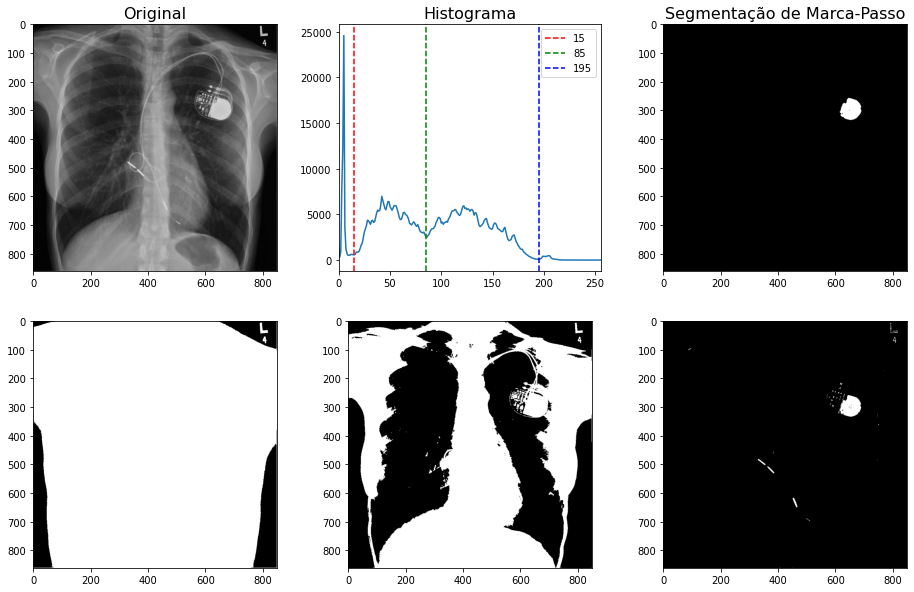

In [11]:
src_img = cv2.imread("imagens/pacemaker.png", 0 )
hist = cv2.calcHist([src_img], [0], None, [256], [0,256])
    
_, th1 = cv2.threshold(src_img, 15, 255, cv2.THRESH_BINARY)
_, th2 = cv2.threshold(src_img, 85, 255, cv2.THRESH_BINARY)
_, th3 = cv2.threshold(src_img, 195, 255, cv2.THRESH_BINARY)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
th4 = cv2.erode(th3, kernel, iterations = 4)
th4 = cv2.dilate(th4, kernel, iterations = 5)

# Plots
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize=(16, 10))
    
# Imagem Original
axs[0][0].imshow(src_img, vmin = 0, vmax = 255, cmap="gray")
axs[0][0].set_title("Original", fontsize = 16)

# Histograma
axs[0][1].plot(hist)
axs[0][1].set_xlim([0,256])
axs[0][1].axvline(x=15, label="15", c="r", ls="--")
axs[0][1].axvline(x=85, label="85", c="g", ls="--")
axs[0][1].axvline(x=195, label="195", c="b", ls="--")
axs[0][1].set_title("Histograma", fontsize = 16)
axs[0][1].legend()

# Segmentação de Marca-Passo
axs[0][2].imshow(th4, vmin = 0, vmax = 255, cmap="gray")
axs[0][2].set_title("Segmentação de Marca-Passo", fontsize = 16)

axs[1][0].imshow(th1, vmin = 0, vmax = 255, cmap="gray")
axs[1][1].imshow(th2, vmin = 0, vmax = 255, cmap="gray")
axs[1][2].imshow(th3, vmin = 0, vmax = 255, cmap="gray")

## <span style='color:green'>Respostas da Questão 3:</span>

* (a) <span style='color:green'>Adicione sua resposta aqui.</span>

 ## <span style='color:blue'>Questão 4: [Valor da Questão: 2.0][Taxa de acerto: x.x]</span>
* (a) <span style='color:blue'> **O código abaixo realiza a segmentação de uma imagem utilizando limiarização de Otsu e limiarização Adaptativa. Qual método foi mais bem sucedido? Por que esse método funcionou melhor que os outros?**</span>

Text(0.5, 1.0, 'ADAPTIVE_THRESH_GAUSSIAN_C')

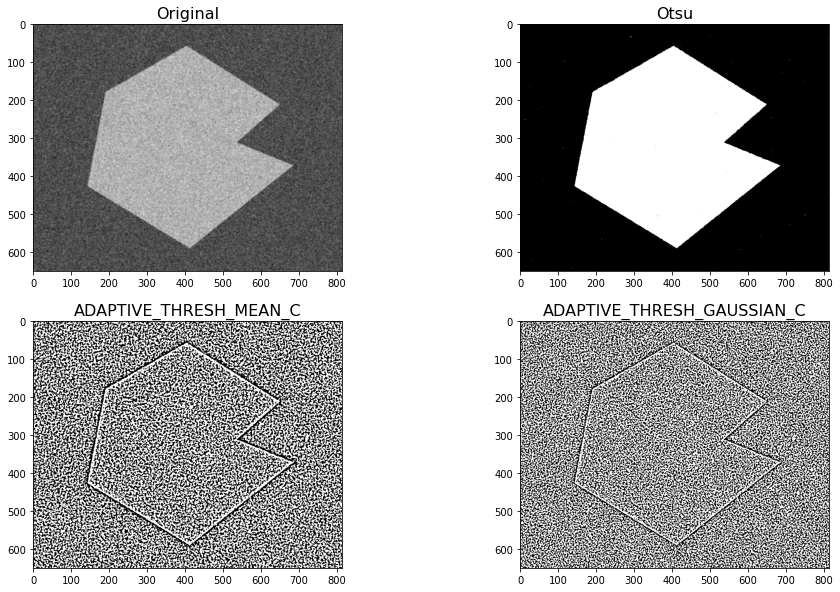

In [22]:
src_img = cv2.imread("imagens/Fig1036(c)(gaussian_noise_mean_0_std_50_added).tif", 0 )
src_img = cv2.GaussianBlur(src_img,(5,5),0)
hist = cv2.calcHist([src_img], [0], None, [256], [0,256])
    
limiar, th1 = cv2.threshold( src_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU )
th2 = cv2.adaptiveThreshold(src_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
th3 = cv2.adaptiveThreshold(src_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Plots
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize=(16, 10))
    
# Imagem Original
axs[0][0].imshow(src_img, vmin = 0, vmax = 255, cmap="gray")
axs[0][0].set_title("Original", fontsize = 16)

axs[0][1].imshow(th1, vmin = 0, vmax = 255, cmap="gray")
axs[0][1].set_title("Otsu", fontsize = 16)

axs[1][0].imshow(th2, vmin = 0, vmax = 255, cmap="gray")
axs[1][0].set_title("ADAPTIVE_THRESH_MEAN_C", fontsize = 16)

axs[1][1].imshow(th3, vmin = 0, vmax = 255, cmap="gray")
axs[1][1].set_title("ADAPTIVE_THRESH_GAUSSIAN_C", fontsize = 16)

## <span style='color:green'>Respostas da Questão 4:</span>

* (a) <span style='color:green'>Adicione sua resposta aqui.</span>

* (b) <span style='color:blue'> **O código abaixo realiza a segmentação de uma imagem utilizando limiarização de Otsu e limiarização Adaptativa. Qual método foi mais bem sucedido? Por que esse método funcionou melhor que os outros?**</span>

Text(0.5, 1.0, 'ADAPTIVE_THRESH_GAUSSIAN_C')

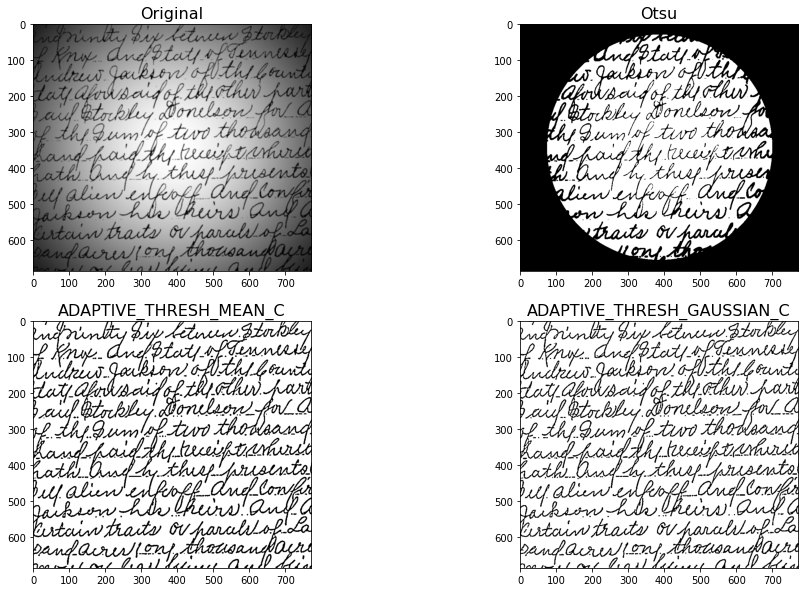

In [12]:
src_img = cv2.imread("imagens/Fig1049(a)(spot_shaded_text_image).tif", 0 )
src_img = cv2.GaussianBlur(src_img,(5,5),0)
hist = cv2.calcHist([src_img], [0], None, [256], [0,256])
    
limiar, th1 = cv2.threshold( src_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU )
th2 = cv2.adaptiveThreshold(src_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
th3 = cv2.adaptiveThreshold(src_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Plots
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize=(16, 10))
    
# Imagem Original
axs[0][0].imshow(src_img, vmin = 0, vmax = 255, cmap="gray")
axs[0][0].set_title("Original", fontsize = 16)

axs[0][1].imshow(th1, vmin = 0, vmax = 255, cmap="gray")
axs[0][1].set_title("Otsu", fontsize = 16)

axs[1][0].imshow(th2, vmin = 0, vmax = 255, cmap="gray")
axs[1][0].set_title("ADAPTIVE_THRESH_MEAN_C", fontsize = 16)

axs[1][1].imshow(th3, vmin = 0, vmax = 255, cmap="gray")
axs[1][1].set_title("ADAPTIVE_THRESH_GAUSSIAN_C", fontsize = 16)

## <span style='color:green'>Respostas da Questão 4:</span>

* (b) <span style='color:green'>Adicione sua resposta aqui.</span>

* (c) <span style='color:blue'> **Qual a função do filtro gaussiano aplicado antes da limiarização? A sua retirada produz efeitos significativos nas imagens dos itens a e b? Experimente também em outras figuras da pasta de imagens e comente os resultados.**</span>

In [13]:
# IMPLEMENTE SEU CÓDIGO AQUI -> QUESTÃO 4 letra (c)

## <span style='color:green'>Respostas da Questão 4:</span>

* (c) <span style='color:green'>Adicione sua resposta aqui.</span>

## Segmentação por Cor

Utilizando espaço de cores como HSV é possível segmentar imagens a partir das cores de objetos. Nesse contexto, a biblioteca OpenCV disponibiliza funções para a conversão de espaço de cores e para a filtragem das imagens coloridas:

1. **Conversão RGB -> HSV**:  
    * **hsv_img = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2HSV)**
    * O canal **H** corresponde à tonalidade da cor e determina o ângulo no cilindro da figura abaixo. Varia de 0 a 180 sendo cada unidade correspondente a 2 graus no ângulo descrito;
    * O canal **S** corresponde à saturação e determina a pureza das cores, quanto menor o valor de S mais diluído em cinza é a tonalidade da cor, determina o raio no cilindro da figura abaixo. Varia de 0 a 255;
    * O canal **V** corresponde à intensidade luminosa (ou brilho) e determina a altura no cilindro da figura abaixo. O canal V pode ser pensado como a imagem em escala de cinza. Varia de 0 a 255;
2. Seleção de elementos intermediários:
    * **mask = cv2.inRange(src_img, lower_bound, higher_bound)**
    * **src_img** é a imagem de entrada;
    * **lower_bound** é um array que determina limiares inferiores;
    * **higher_bound** é um array que determina limiares superiores;
    * **mask** é uma imagem binária cujos pixels tem valor alto (255) se os respectivos valores de src_img estão entre os valores de lower_bound e higher_bound para todas as coordenadas;
    
Observações:

* Vermelho se localiza nos arredores de 0 graus.
* Amarelo se localiza nos arredores de 60 graus.
* Verde se localiza nos arredores de 120 graus.
* Ciano se localiza nos arredores de 180 graus.
* Azul se localiza nos arredores de 240 graus.
* Magenta se localiza nos arredores de 300 graus.
* Tons mais específicos podem ser localizados empiricamente.
* O valor no OpenCV é o nº de graus dividido por 2.

![caption](files/images/hsv.png)

 ## <span style='color:blue'>Questão 5: [Valor da Questão: 2.0][Taxa de acerto: x.x]</span>
* <span style='color:blue'> **O código abaixo realiza a segmentação de uma maçã na imagem “apple.jpg” a partir da sua cor. Analise o código e comente os resultados produzidos.**</span>
    * (a) <span style='color:blue'>O que acontece se a etapa de erosão for retirada? </span>
    * (b) <span style='color:blue'>E a etapa de dilatação? </span>

Text(0.5, 1.0, 'Combinação')

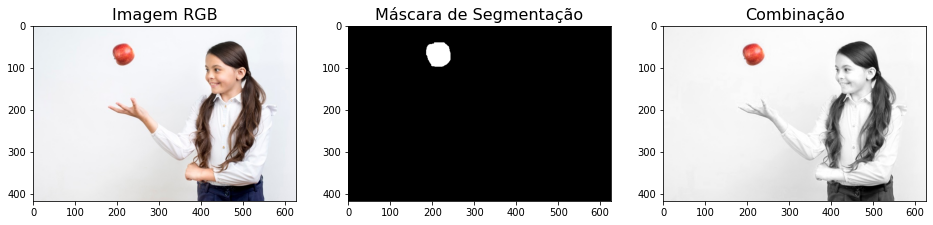

In [28]:
# Carrega a imagem e converte
rgb_img = cv2.imread("imagens/apple.jpg" )[:,:,::-1]
hsv_img = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2HSV)

# Filtragem por cor
min_HUE =   0; max_HUE = 30
min_SAT = 145; max_SAT = 255
min_VAL = 135; max_VAL = 255
mask = cv2.inRange(hsv_img, (min_HUE, min_SAT, min_VAL), (max_HUE, max_SAT, max_VAL))
H, W = mask.shape

# Supressão de ruído
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
mask = cv2.erode(mask, kernel, iterations = 1)

# Preenchimento de buracos
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
mask = cv2.dilate(mask, kernel, iterations = 3)

# Aplicação de máscaras
color_img = cv2.bitwise_and(rgb_img, rgb_img, mask=mask)
gray_img = cv2.bitwise_and(hsv_img[:,:, 2], hsv_img[:,:, 2], mask=~mask)

# O reshape serve apenas pra poder somar as imagens
dst_img = gray_img.reshape( ( H, W, 1 ) ) + color_img

# Plots
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(16, 10))
    
# Imagem Original
axs[0].imshow(rgb_img, vmin = 0, vmax = 255, cmap="gray")
axs[0].set_title("Imagem RGB", fontsize = 16)

axs[1].imshow(mask, vmin = 0, vmax = 255, cmap="gray")
axs[1].set_title("Máscara de Segmentação", fontsize = 16)

axs[2].imshow(dst_img, vmin = 0, vmax = 255, cmap="gray")
axs[2].set_title("Combinação", fontsize = 16)

Text(0.5, 1.0, 'Combinação')

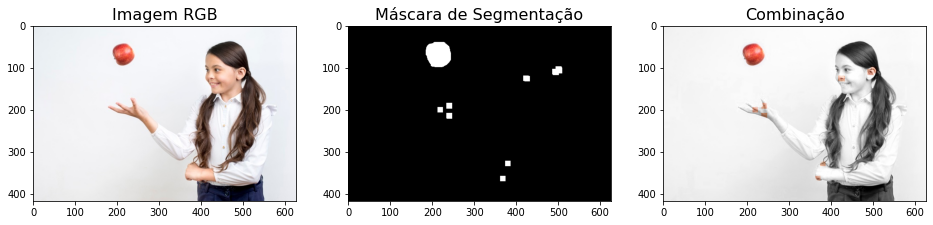

In [14]:
# IMPLEMENTE SEU CÓDIGO AQUI -> QUESTÃO 5 letra (a)

# Carrega a imagem e converte
rgb_img = cv2.imread("imagens/apple.jpg") [:,:,::-1]
hsv_img = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2HSV)

# Filtragem por cor
min_HUE =   0; max_HUE = 30
min_SAT = 145; max_SAT = 255
min_VAL = 135; max_VAL = 255
mask = cv2.inRange(hsv_img, (min_HUE, min_SAT, min_VAL), (max_HUE, max_SAT, max_VAL))
H, W = mask.shape

# remoção da erosão
#kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
#mask = cv2.erode(mask, kernel, iterations = 1)

# Preenchimento de buracos
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
mask = cv2.dilate(mask, kernel, iterations = 3)

# Aplicação de máscaras
color_img = cv2.bitwise_and(rgb_img, rgb_img, mask=mask)
gray_img = cv2.bitwise_and(hsv_img[:,:, 2], hsv_img[:,:, 2], mask=~mask)

# O reshape serve apenas pra poder somar as imagens
dst_img = gray_img.reshape( ( H, W, 1 ) ) + color_img

# Plots
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(16, 10))
    
# Imagem Original
axs[0].imshow(rgb_img, vmin = 0, vmax = 255, cmap="gray")
axs[0].set_title("Imagem RGB", fontsize = 16)

axs[1].imshow(mask, vmin = 0, vmax = 255, cmap="gray")
axs[1].set_title("Máscara de Segmentação", fontsize = 16)

axs[2].imshow(dst_img, vmin = 0, vmax = 255, cmap="gray")
axs[2].set_title("Combinação", fontsize = 16)

Text(0.5, 1.0, 'Combinação')

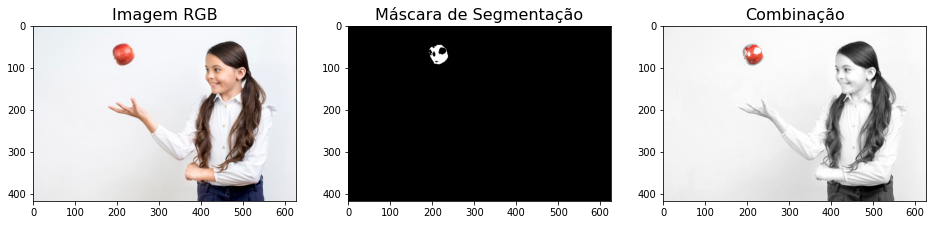

In [15]:
# IMPLEMENTE SEU CÓDIGO AQUI -> QUESTÃO 5 letra (b)

# Carrega a imagem e converte
rgb_img = cv2.imread("imagens/apple.jpg") [:,:,::-1]
hsv_img = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2HSV)

# Filtragem por cor
min_HUE =   0; max_HUE = 30
min_SAT = 145; max_SAT = 255
min_VAL = 135; max_VAL = 255
mask = cv2.inRange(hsv_img, (min_HUE, min_SAT, min_VAL), (max_HUE, max_SAT, max_VAL))
H, W = mask.shape

# Supressão de ruído
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
mask = cv2.erode(mask, kernel, iterations = 1)

# remoção da dilatação
#kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
#mask = cv2.dilate(mask, kernel, iterations = 3)

# Aplicação de máscaras
color_img = cv2.bitwise_and(rgb_img, rgb_img, mask=mask)
gray_img = cv2.bitwise_and(hsv_img[:,:, 2], hsv_img[:,:, 2], mask=~mask)

# O reshape serve apenas pra poder somar as imagens
dst_img = gray_img.reshape( ( H, W, 1 ) ) + color_img

# Plots
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(16, 10))
    
# Imagem Original
axs[0].imshow(rgb_img, vmin = 0, vmax = 255, cmap="gray")
axs[0].set_title("Imagem RGB", fontsize = 16)

axs[1].imshow(mask, vmin = 0, vmax = 255, cmap="gray")
axs[1].set_title("Máscara de Segmentação", fontsize = 16)

axs[2].imshow(dst_img, vmin = 0, vmax = 255, cmap="gray")
axs[2].set_title("Combinação", fontsize = 16)

## <span style='color:green'>Respostas da Questão 5:</span>

* (a) <span style='color:green'>Adicione sua resposta aqui.</span>
* (b) <span style='color:green'>Adicione sua resposta aqui.</span>

* (c) <span style='color:blue'> **Seria possível realizar um processo semelhante utilizando o espaço RGB?. Quais seriam as principais dificuldades de se utilizar esse espaço de cores?**</span>

## <span style='color:green'>Respostas da Questão 5:</span>

* (c) <span style='color:green'>Adicione sua resposta aqui.</span>

 ## <span style='color:blue'>Questão 6: [Valor da Questão: 2.0][Taxa de acerto: x.x]</span>
* <span style='color:blue'>**j. Carregue a imagem "frutas.jpg" como uma imagem colorida e segmente os elementos pedidos.**</span>
    * <span style='color:blue'>Localize apenas as uvas.</span> 
    * <span style='color:blue'>Localize apenas os kiwis.</span>
    * <span style='color:blue'>Localize apenas os abacaxis.</span>
    * <span style='color:blue'>Localize as uvas, kiwis e os abacaxis.</span>
    * <span style='color:blue'>Localize os morangos e as framboesas.</span>
    * <span style='color:blue'>Nessa questão não é necessário utilizar morfologia matemática.</span>

In [ ]:
# IMPLEMENTE SEU CÓDIGO AQUI -> QUESTÃO 6 

***
![gif](https://user-images.githubusercontent.com/58775072/134608733-adf85328-5f95-49a6-833c-4c54ef5d3614.gif)